# Question 1:

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('2019 Winter Data Science Intern Challenge Data Set.csv')
print(data.head())

   order_id  shop_id  user_id  order_amount  total_items payment_method  \
0         1       53      746           224            2           cash   
1         2       92      925            90            1           cash   
2         3       44      861           144            1           cash   
3         4       18      935           156            1    credit_card   
4         5       18      883           156            1    credit_card   

            created_at  
0  2017-03-13 12:36:56  
1  2017-03-03 17:38:52  
2   2017-03-14 4:23:56  
3  2017-03-26 12:43:37  
4   2017-03-01 4:35:11  


The most well-known metric for average is the mean. I suspect that AOV calculated is the mean of the *order_amount* column.

In [7]:
print(data['order_amount'].mean())

3145.128


This hypothesis was correct. It seems the mean is being skewed by outliers. We will visualize the distribution of the *order_amount* values.

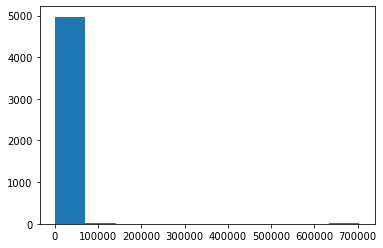

In [10]:
plt.hist(data['order_amount'])
plt.show()

We see that there are some extreme outliers. We investigate this further.

In [11]:
data.shape

(5000, 7)

In [12]:
data[data['order_amount'] >= 75000]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
691,692,78,878,154350,6,debit,2017-03-27 22:51:43
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00
1259,1260,78,775,77175,3,credit_card,2017-03-27 9:27:20
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00


So it seems like we have quite a few outliers with price far above what we would expect the average price to be for sneakers. Let's see what happens to the mean when we remove these values.

In [15]:
data[data['order_amount'] < 75000]['order_amount'].mean()

564.3232099758649

This is much more reasonable, albeit still quite high. But this is not a reasonable metric, as we cannot simply drop outliers until we get an average value we find reasonable. Instead, we will use a more robust measure of average. We will try two here. The first is the median, which orders the values then takes the value that is in the middle.

In [16]:
data['order_amount'].median()

284.0

The second is the midpoint of the interquartile range.

In [18]:
data['order_amount'].quantile([0.25,0.75]).mean()

276.5

It is promising that these values are similar, as it speaks to the robustness of these metrics. I would choose to use to report the median for the AOV, with value 284.

# Question 2:
a. How many orders were shipped by Speedy Express in total?

**Solution:**
First we write the query

	SELECT ShipperID FROM Shippers
    WHERE ShipperName = 'Speedy Express';

which tells us that Speedy Express has ShipperID 1. Then we perform a query to 
calculate how many orders in the Orders table have this ShipperID. In particular, we 
write

	SELECT SUM(1) FROM Orders
    GROUP BY ShipperID
    HAVING ShipperID = 1;
	
This tells us that 54 orders were shipped by Speedy Express.
	
b. What is the last name of the employee with the most orders?

**Solution:**
First we have to look at the Orders table to find the EmployeeID of the employee with the 
most orders. We use the query

    SELECT EmployeeID, SUM(1) FROM Orders
    GROUP BY EmployeeID
    ORDER BY SUM(1) DESC LIMIT 1;

This tells us that the employee with ID 4 has the most orders, in particular they 
have 40. Then we use the Employees table to get the last name of the employee with this ID. We use the query

    SELECT LastName FROM Employees
    WHERE EmployeeID = 4;

This tells us that the last name of the employee with the most orders is Peacock.

c. What product was ordered the most by customers in Germany?

**Solution:**
The first query joins three tables: OrderDetails, Orders, and Customers. This query tells 
us the Product ID of the product that was ordered the most by customers in Germany 
(note: I am assuming the question was asking which product had the most orders, not 
had the highest volume ordered. To find the latter, we would also SELECT quantity for 
ProductOrders and SUM over this value.)

	WITH ProductOrders AS (
    SELECT od.ProductID, o.CustomerID
    FROM OrderDetails AS od
    INNER JOIN Orders AS o
        ON od.OrderID = o.OrderID
    ) 
    SELECT po.ProductID, SUM(1)
    FROM ProductOrders AS po
    INNER JOIN Customers AS c
        ON po.CustomerID = c.CustomerID
    WHERE c.Country = 'Germany'
    GROUP BY po.ProductID
    ORDER BY SUM(1) DESC LIMIT 1;
	
This tells us that the product with ProductID 31 has the most orders by German 
customers with 5. To determine which product this is, we only have to make one simple 
query:

    SELECT ProductName FROM Products
    WHERE ProductID = 31;

This tells us the name of the product is Gorgonzola Telino.

